# Import Libraries

In [1]:
!pip install keras==2.3.1

     |████████████████████████████████| 377 kB 600 kB/s 
     |████████████████████████████████| 50 kB 4.1 MB/s 


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow import keras 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

2021-10-01 14:38:31.019710: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-01 14:38:31.019866: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Import Dataset

# Image Generator

In [3]:
train_generator = ImageDataGenerator(rescale = 1./255,  #generate train images
                                     rotation_range=7,
                                     horizontal_flip=True,
                                     zoom_range=0.2)

train_dataset = train_generator.flow_from_directory('../input/homerbart2/homer_bart_2/training_set',
                                                    target_size=(64, 64),
                                                    batch_size = 8,
                                                    class_mode='categorical',
                                                    shuffle=True)
test_generator = ImageDataGenerator(rescale = 1./255)

test_dataset = test_generator.flow_from_directory('../input/homerbart2/homer_bart_2/test_set', 
                                                  target_size=(64,64),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 215 images belonging to 2 classes.
Found 54 images belonging to 2 classes.


In [4]:
print(train_dataset.classes, train_dataset.class_indices,sep='\n\n')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

{'bart': 0, 'homer': 1}


# Model

In [5]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())    #1152 outputs
#(1152 + 2)/2 = 577
model.add(Dense(units=577, activation='relu'))
model.add(Dense(units=577, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

2021-10-01 14:38:37.807240: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 14:38:37.810288: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-01 14:38:37.810322: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-01 14:38:37.810347: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b57e1796788f): /proc/driver/nvidia/version does not exist
2021-10-01 14:38:37.811260: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

# Visualise Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

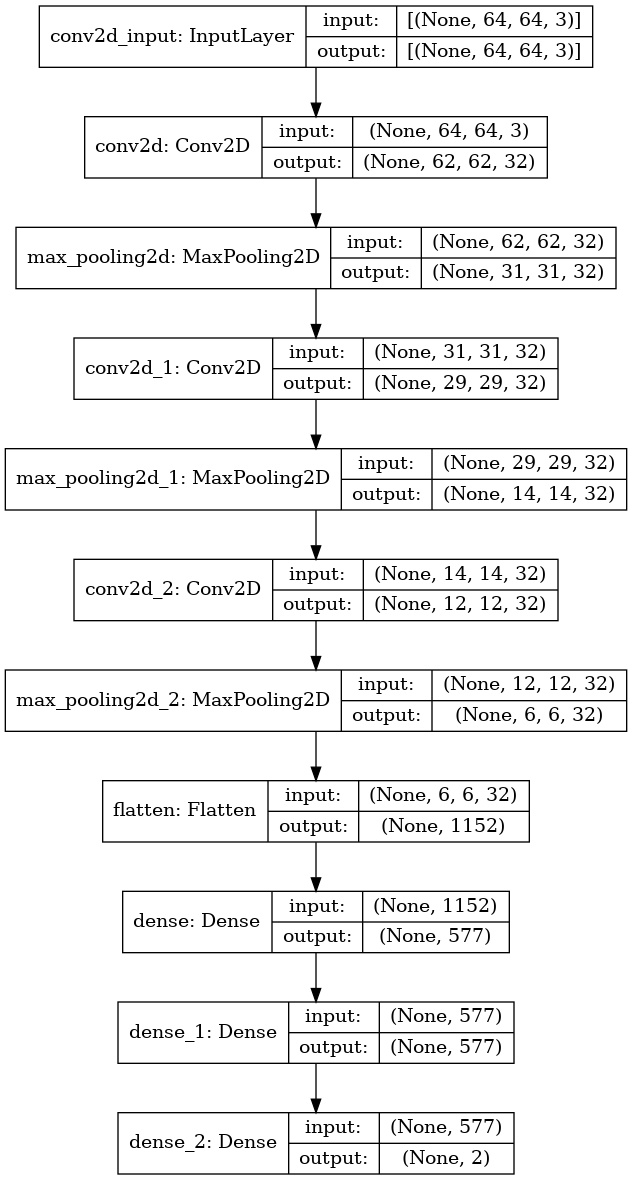

In [6]:
model.summary()
tf.keras.utils.plot_model(model, to_file='Model.png', show_shapes=True)

# Training

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_history = model.fit(train_dataset, epochs=50)

2021-10-01 14:38:39.687425: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-01 14:38:39.696284: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/50
27/27 [==============================] - 3s 73ms/step - loss: 0.7000 - accuracy: 0.5615
Epoch 2/50
27/27 [==============================] - 1s 33ms/step - loss: 0.5887 - accuracy: 0.6785
Epoch 3/50
27/27 [==============================] - 1s 33ms/step - loss: 0.5950 - accuracy: 0.7388
Epoch 4/50
27/27 [==============================] - 1s 33ms/step - loss: 0.5708 - accuracy: 0.7182
Epoch 5/50
27/27 [==============================] - 1s 34ms/step - loss: 0.5203 - accuracy: 0.7260
Epoch 6/50
27/27 [==============================] - 1s 33ms/step - loss: 0.4431 - accuracy: 0.7957
Epoch 7/50
27/27 [==============================] - 1s 33ms/step - loss: 0.3643 - accuracy: 0.8539
Epoch 8/50
27/27 [==============================] - 1s 34ms/step - loss: 0.3389 - accuracy: 0.8540
Epoch 9/50
27/27 [==============================] - 1s 34ms/step - loss: 0.3893 - accuracy: 0.7680
Epoch 10/50
27/27 [==============================] - 1s 33ms/step - loss: 0.1845 - accuracy: 0.9066
Epoch 11/

# Visualise Efficiency On Train Dataset

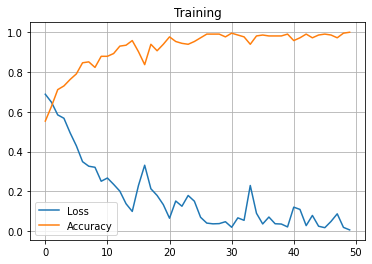

In [8]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['accuracy'])
plt.grid(True)
plt.legend(['Loss','Accuracy'])
plt.title('Training')
plt.savefig('Training.jpg')

# Evaluation On Test Set

Accuracy : 92.5925925925926
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.85      0.92        26

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.93        54
weighted avg       0.94      0.93      0.93        54



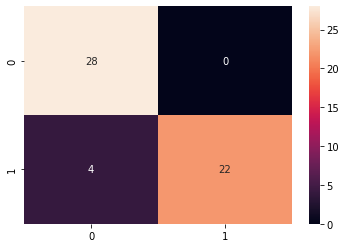

In [9]:
predictions = model.predict(test_dataset)

#since we used categorical model(not binary) we get probabilities for an image to be in each class
#so we consider that the image belogs to the class with higher probability
#print(predictions)
predictions = np.argmax(predictions, axis=1)

#print(test_dataset.classes) #expected classes
#print('\n',predictions) #predicted classes

print('Accuracy :',accuracy_score(predictions,test_dataset.classes)*100)    #accuracy
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)
print(classification_report(test_dataset.classes, predictions))

# Save Model

In [10]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

model_saved = tf.keras.models.save_model(model, './weights.hdf5')

# Load Model

In [11]:
with open('model.json', 'r') as json_file:
    json_saved_model = json_file.read()

model_loaded = tf.keras.models.model_from_json(json_saved_model)
model_loaded.load_weights('weights.hdf5')
model_loaded.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

# Test Single Image

In [12]:
path = '../input/homerbart2/homer_bart_2/test_set/bart/bart1.bmp'
image = cv2.imread(path)
#tf.keras.preprocessing.image.load_img(path)
image = cv2.resize(image, (64,64))
image = image/ 255    #normalise
#print(image.shape)
image = image.reshape(-1, 64,64,3)      #reshape in format to send more than one image to predict
#print(image.shape)

result = model_loaded.predict(image)
#print(result)  #probabilities that the image belong to each class
result = np.argmax(result, axis=1)

if(result==0):
    print('Bart')
else:
    print('Homer')

Bart
